In [61]:
# importing libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [62]:
def months(m):
    if (m=='Jan'):
        return 1
    if (m=='Feb'):
        return 2
    if (m=='Mar'):
        return 3
    if (m=='Apr'):
        return 4
    if (m=='May'):
        return 5
    if (m=='Jun'):
        return 6
    if (m=='Jul'):
        return 7
    if (m=='Aug'):
        return 8
    if (m=='Sep'):
        return 9
    if (m=='Oct'):
        return 10
    if (m=='Nov'):
        return 11
    if (m=='Dec'):
        return 12

In [63]:
import requests
from datetime import date
data = (requests.get(url = "https://api.covid19india.org/states_daily.json")).json()
#print (data)
data = data['states_daily']
cx = []
cy = []
rx = []
ry = []
dx = []
dy = []
for i in data:
    if (i['status']=='Confirmed'):
        din = i['date']
        day = int(din[0:2])
        month = int(months(din[3:6]))
        year = int('20'+din[7:9])
        f_date = date(2020, 3, 14)
        l_date = date(year, month, day)
        delta = l_date - f_date
        cx.append(delta.days)
        cy.append(i['dl'])
    elif (i['status']=='Recovered'):
        din = i['date']
        day = int(din[0:2])
        month = int(months(din[3:6]))
        year = int('20'+din[7:9])
        f_date = date(2020, 3, 14)
        l_date = date(year, month, day)
        delta = l_date - f_date
        rx.append(delta.days)
        ry.append(i['dl'])
    else:
        din = i['date']
        day = int(din[0:2])
        month = int(months(din[3:6]))
        year = int('20'+din[7:9])
        f_date = date(2020, 3, 14)
        l_date = date(year, month, day)
        delta = l_date - f_date
        dx.append(delta.days)
        dy.append(i['dl'])
# print (len(cx))
# print (len(cy))
# print (len(rx))
# print (len(ry))
# print (len(dx))
# print (len(dy))

191
191
191
191
191
191


In [64]:
cx = np.array(cx)
cy = np.array(cy)
cx = cx.astype('int64')
cy = cy.astype('int64')
# print (cx.dtype)
# print (cy.dtype)
# print(cx)
# print(cy)

In [65]:
#First we are plotting the data of confirmed cases in delhi

In [66]:
x = cx
y = cy

In [67]:
# plt.scatter(cx,cy, color='y')
# plt.show()

In [68]:
#defining hypothesis 
def hypothesis(theta, x):
    return theta[0] + theta[1]*x

In [69]:
# defining update rule 
def gradient(x,y,theta):
    grad = np.array([0.0,0.0])
    m = x.shape[0]
    for i in range(m):
        grad[0] += (hypothesis(theta,x[i]) - y[i])
        grad[1] += (hypothesis(theta,x[i]) - y[i])*x[i]
    return grad

In [70]:
#applying gradient_descent
def gradient_descent(x,y,learning_rate,maxIter):
    theta = np.array([0.0,0.0])
    for i in range(maxIter):
        grad = gradient(x,y,theta)
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]        
    return theta

In [71]:
theta = gradient_descent(x,y,learning_rate=0.00000001,maxIter=10000)
print(theta[0], theta[1])

-0.8113565072960656 13.901319309143897


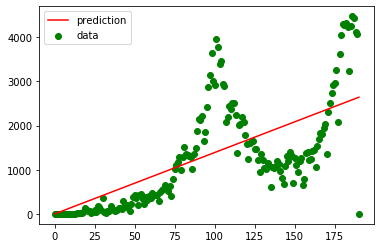

In [72]:
plt.scatter(x,y, color='g', label='data')
plt.plot(x,hypothesis(theta,x), color='r', label='prediction')
plt.legend()
plt.show()

In [73]:
#Second we are plotting the data of recovered cases in delhi

In [74]:
rx = np.array(rx)
ry = np.array(ry)
rx = rx.astype('int64')
ry = ry.astype('int64')
# print (rx.dtype)
# print (ry.dtype)
# print(rx)
# print(ry)

In [75]:
x = rx
y = ry

In [76]:
# plt.scatter(x,y, color='y')
# plt.show()

In [77]:
theta = gradient_descent(x,y,learning_rate=0.00000001,maxIter=10000)
print(theta[0], theta[1])

-1.0765434133366463 12.00205210306684


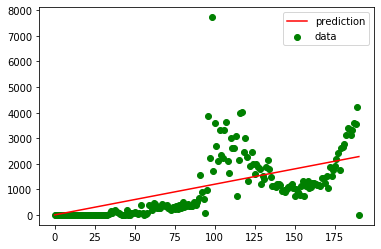

In [78]:
plt.scatter(x,y, color='g', label='data')
plt.plot(x,hypothesis(theta,x), color='r', label='prediction')
plt.legend()
plt.show()

In [79]:
#Second we are plotting the data of deceased cases in delhi

In [80]:
dx = np.array(dx)
dy = np.array(dy)
dx = dx.astype('int64')
dy = dy.astype('int64')
# print (dx.dtype)
# print (dy.dtype)
# print(dx)
# print(dy)

In [81]:
x = dx
y = dy

In [82]:
# plt.scatter(x,y, color='y')
# plt.show()

In [83]:
theta = gradient_descent(x,y,learning_rate=0.00000001,maxIter=10000)
print(theta[0], theta[1])

0.05690559171730575 0.24168987285330937


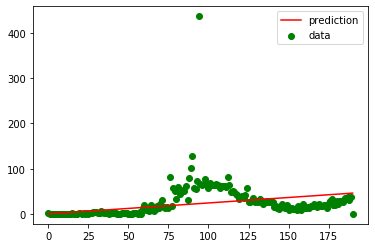

In [84]:
plt.scatter(x,y, color='g', label='data')
plt.plot(x,hypothesis(theta,x), color='r', label='prediction')
plt.legend()
plt.show()

In [101]:
from sklearn.linear_model import LinearRegression

In [102]:
model = LinearRegression()

(191, 1)
(191, 1)
[-191.6861911]
[[15.40430215]]


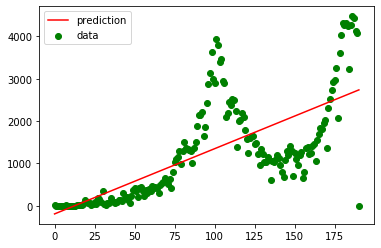

In [103]:
x = np.array(cx)
y = np.array(cy)
x = x.reshape((-1,1))
y = y.reshape((-1,1))
print (x.shape)
print (y.shape)
model.fit(x, y)
bias = model.intercept_
coeff = model.coef_
#bias is the intercept and coeff is the slope
print (bias)
print (coeff)
plt.scatter(x,y, color='g', label='data')
plt.plot(x,hypothesis([bias, coeff],x), color='r', label='prediction')
plt.legend()
plt.show()

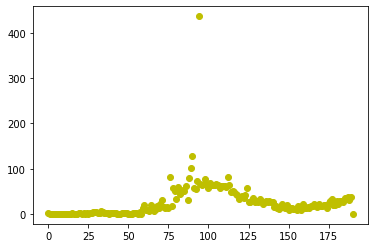

(191, 1)
(191, 1)
[11.4582788]
[[0.15191341]]


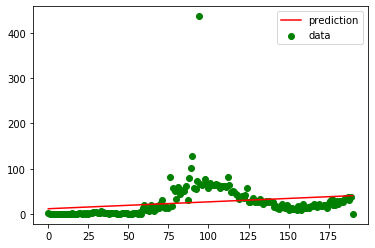

In [104]:
x = np.array(dx)
y = np.array(dy)
x = x.reshape((-1,1))
y = y.reshape((-1,1))
plt.scatter(x,y, color='y')
plt.show()
print (x.shape)
print (y.shape)
model.fit(x, y)
bias = model.intercept_
coeff = model.coef_
#bias is the intercept and coeff is the slope
print (bias)
print (coeff)
plt.scatter(x,y, color='g', label='data')
plt.plot(x,hypothesis([bias, coeff],x), color='r', label='prediction')
plt.legend()
plt.show()

(191, 1)
(191, 1)
[-243.82149869]
[[13.91346962]]


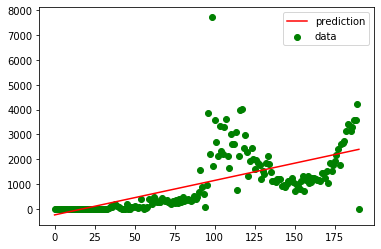

In [105]:
x = np.array(rx)
y = np.array(ry)
x = x.reshape((-1,1))
y = y.reshape((-1,1))
print (x.shape)
print (y.shape)
model.fit(x, y)
bias = model.intercept_
coeff = model.coef_
#bias is the intercept and coeff is the slope
print (bias)
print (coeff)
plt.scatter(x,y, color='g', label='data')
plt.plot(x,hypothesis([bias, coeff],x), color='r', label='prediction')
plt.legend()
plt.show()